In [160]:
import csv
import random

path = r'D:\big_data_lab.csv'
headers = ['salary', 'city', 'age', 'vacation_prefer', 'transport_prefer', 'target']
rows = 1000

with open(path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(headers)

    for _ in range(rows):
        salary = random.randint(10000, 90000)
        city = random.choice(['Osh', 'Bishkek', 'IK'])
        age = random.randint(21, 70)
        vacation_prefer = random.choice(['Shopping', 'Beach', 'Camping'])
        transport_prefer = random.choice(['plane', 'auto', 'bus'])
        target = random.choice(['Milan', 'Barcelona', 'Interlaken'])

        writer.writerow([salary, city, age, vacation_prefer, transport_prefer, target])

In [161]:
import pandas as pd

holiday_df = pd.read_csv(path)
df = holiday_df.copy(deep=True)
holiday_df.isnull().sum()

salary              0
city                0
age                 0
vacation_prefer     0
transport_prefer    0
target              0
dtype: int64

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

categorical_columns = ['city', 'vacation_prefer', 'transport_prefer', 'target']

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

num_features = X.select_dtypes(include=['int64', 'float64']).columns
transformer = MinMaxScaler()

# exclude 'target'
cat_features = categorical_columns[:-1]
transformer1 = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer, num_features),
        ('cat', transformer1, cat_features)
    ])

svm = SVC()
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', svm)])
clf.fit(X_train, y_train)

data_predict = pd.DataFrame({
    'salary': [80000],
    'city': ['Osh'],
    'age': [22],
    'vacation_prefer': ['Camping'],
    'transport_prefer': ['bus']
})

# ensure the columns are in the same order as the training data
data_predict = data_predict[X.columns]

prediction = clf.predict(data_predict)
print('predicted target city:', prediction[0])
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

predicted target city: Interlaken
Accuracy: 0.324


In [165]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['city', 'vacation_prefer', 'transport_prefer', 'target']
le = LabelEncoder()

for c in categorical_columns:
    df[c] = le.fit_transform(df[c])

df

,salary,city,age,vacation_prefer,transport_prefer,target
0,17715,0,24,0,1,2
1,60071,1,62,0,0,1
2,80734,0,50,1,1,0
3,72518,0,39,0,2,0
4,30995,2,24,2,1,1
...,...,...,...,...,...,...
995,45030,0,44,2,1,2
996,17296,0,29,2,2,0
997,33428,2,54,1,1,1
998,88351,1,53,2,1,1


In [166]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = df.drop('target', axis=1)
y = df['target']

# normalize
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('model accuracy:', accuracy)

model accuracy: 0.288


[[18 31 23]
 [29 36 24]
 [32 39 18]]


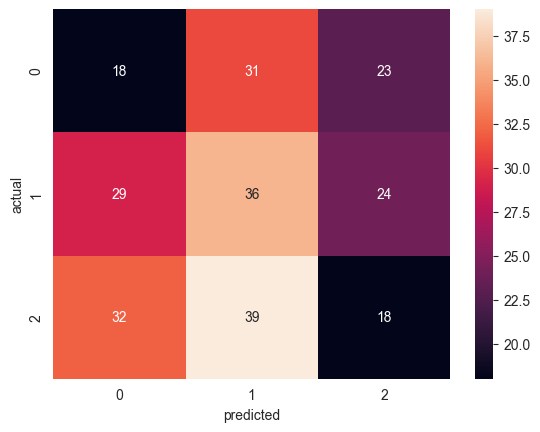

In [167]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

confusion = confusion_matrix(y_test, y_pred)
print(confusion)

sns.heatmap(confusion, annot=True)

plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [168]:
from sklearn.svm import SVC

best_svc = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        s_score = svm.score(X_test, y_test)

        if s_score > best_svc:
            best_svc = s_score
            best_combo = {'gamma': gamma, 'C': C}

print('best SVM score: {}'.format(best_svc))
print('best parameters: {}'.format(best_combo))

best SVM score: 0.356
best parameters: {'gamma': 0.001, 'C': 0.001}


In [169]:
# grid search using sklearn lib
from sklearn.model_selection import GridSearchCV

grid1 = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
gs1 = GridSearchCV(SVC(), grid1, cv=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
gs1.fit(X_train, y_train)
score1 = gs1.score(X_test, y_test)

print('test score:', score1)
print('best params: ', gs1.best_params_)
print('best score: ', gs1.best_score_)
print('whole args view :', gs1.best_estimator_)

results1 = pd.DataFrame(gs1.cv_results_)
display(results1.head())

test score: 0.332
best params:  {'C': 1, 'gamma': 0.001}
best score:  0.3573333333333334
whole args view : SVC(C=1, gamma=0.001)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.071420,0.029782,0.020208,0.009604,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.346667,0.34,0.346667,0.346667,0.346667,0.345333,0.002667,4
1,0.122733,0.049008,0.047066,0.021223,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.346667,0.34,0.346667,0.346667,0.346667,0.345333,0.002667,4
2,0.046873,0.009882,0.018737,0.006254,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.346667,0.34,0.346667,0.346667,0.346667,0.345333,0.002667,4
3,0.057089,0.006745,0.015623,0.000001,0.001,1,"{'C': 0.001, 'gamma': 1}",0.346667,0.34,0.346667,0.346667,0.346667,0.345333,0.002667,4
4,0.056977,0.012947,0.019582,0.006050,0.001,10,"{'C': 0.001, 'gamma': 10}",0.346667,0.34,0.346667,0.346667,0.346667,0.345333,0.002667,4


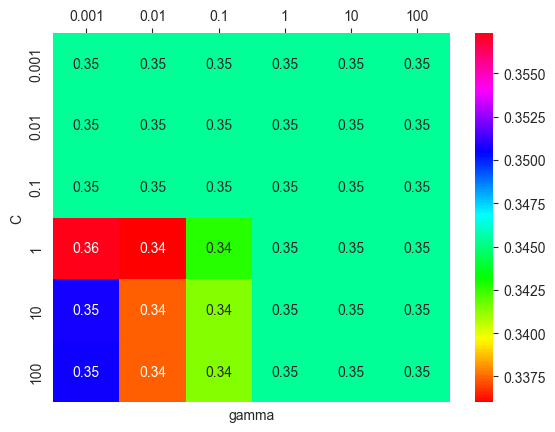

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sc = np.array(results1.mean_test_score).reshape(6, 6)
ax = sns.heatmap(sc, annot=True, xticklabels=grid1['gamma'], yticklabels=grid1['C'], cmap='hsv')
ax.set(xlabel='gamma', ylabel='C')
ax.xaxis.tick_top()

plt.show()

In [171]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.23      0.25      0.24        72
           1       0.34      0.40      0.37        89
           2       0.28      0.20      0.23        89

    accuracy                           0.29       250
   macro avg       0.28      0.29      0.28       250
weighted avg       0.29      0.29      0.28       250
